In [2]:
from  google.colab  import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [4]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [5]:
!ls

final_test.csv		       kaggle.json  test_X.csv
gtsrb-german-traffic-sign.zip  test_X	    traffic_sign


In [16]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os

data = []
labels = []
classes = 43
cur_path = os.getcwd()
j=0
for i in range(classes):
    path = os.path.join(cur_path,'traffic_sign/Train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
            print(j)
            j+=1
        except:
            print("Error loading image")

Streaming output truncated to the last 5000 lines.
34211
34212
34213
34214
34215
34216
34217
34218
34219
34220
34221
34222
34223
34224
34225
34226
34227
34228
34229
34230
34231
34232
34233
34234
34235
34236
34237
34238
34239
34240
34241
34242
34243
34244
34245
34246
34247
34248
34249
34250
34251
34252
34253
34254
34255
34256
34257
34258
34259
34260
34261
34262
34263
34264
34265
34266
34267
34268
34269
34270
34271
34272
34273
34274
34275
34276
34277
34278
34279
34280
34281
34282
34283
34284
34285
34286
34287
34288
34289
34290
34291
34292
34293
34294
34295
34296
34297
34298
34299
34300
34301
34302
34303
34304
34305
34306
34307
34308
34309
34310
34311
34312
34313
34314
34315
34316
34317
34318
34319
34320
34321
34322
34323
34324
34325
34326
34327
34328
34329
34330
34331
34332
34333
34334
34335
34336
34337
34338
34339
34340
34341
34342
34343
34344
34345
34346
34347
34348
34349
34350
34351
34352
34353
34354
34355
34356
34357
34358
34359
34360
34361
34362
34363
34364
34365
34366
34367
34368
3

NameError: ignored

In [17]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical


data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


Using TensorFlow backend.


In [18]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

model=tf.keras.models.Sequential([
          tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(30,30,3)),
          tf.keras.layers.MaxPooling2D(2,2),
          tf.keras.layers.Dropout(rate=0.25),

          tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
          tf.keras.layers.MaxPooling2D(2,2),
          tf.keras.layers.Dropout(rate=0.25),

          tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
          tf.keras.layers.MaxPooling2D(2,2),
          tf.keras.layers.Dropout(rate=0.25),

          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(256,activation='relu'),
          tf.keras.layers.Dropout(rate=0.5),
          tf.keras.layers.Dense(43,activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(lr=0.0001),
    metrics=['accuracy']
)

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         7

In [21]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

Epoch 1/15
981/981 [==============================] - 4s 5ms/step - loss: 3.1877 - accuracy: 0.2292 - val_loss: 1.4362 - val_accuracy: 0.5607
Epoch 2/15
981/981 [==============================] - 4s 4ms/step - loss: 1.3658 - accuracy: 0.5748 - val_loss: 0.5680 - val_accuracy: 0.8453
Epoch 3/15
981/981 [==============================] - 4s 4ms/step - loss: 0.7896 - accuracy: 0.7558 - val_loss: 0.2528 - val_accuracy: 0.9329
Epoch 4/15
981/981 [==============================] - 4s 4ms/step - loss: 0.6092 - accuracy: 0.8145 - val_loss: 0.2002 - val_accuracy: 0.9370
Epoch 5/15
981/981 [==============================] - 4s 4ms/step - loss: 0.5079 - accuracy: 0.8494 - val_loss: 0.1415 - val_accuracy: 0.9639
Epoch 6/15
981/981 [==============================] - 4s 4ms/step - loss: 0.4449 - accuracy: 0.8704 - val_loss: 0.1163 - val_accuracy: 0.9657
Epoch 7/15
981/981 [==============================] - 4s 4ms/step - loss: 0.4292 - accuracy: 0.8773 - val_loss: 0.1205 - val_accuracy: 0.9651
Epoch 

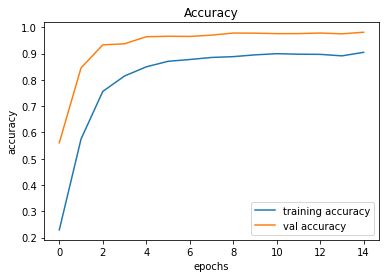

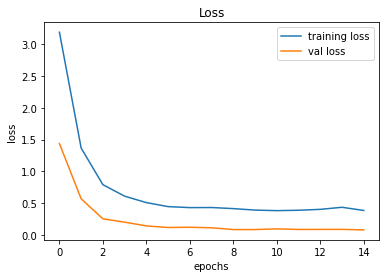

In [23]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


In [ ]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('traffic_sign/Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
#imgs = [s.replace("Test/", "") for s in imgs]
data=[]
j=0
for img in imgs:
    image = Image.open("traffic_sign/"+img)
    image = image.resize((30,30))
    data.append(np.array(image))
    print(j)
    j+=1
X_test=np.array(data)
pred = model.predict_classes(X_test)
#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27